#Question 1

Analyzing nyt2.csv for 1 day analysis

Analyzing nyt2.csv - nyt8.csv for 1 week analysis

In [142]:
#import statements

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime

#For week analysis
import glob

#For map
import geopandas



In [143]:
#mounting drive for using the files

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [144]:
#path to where the files are

PATH = '/content/drive/MyDrive/ENPM808W/'
#/content/drive/MyDrive/ENPM808W/nyt1.csv

In [145]:
#Reading nyt2.csv for single day analysis

day1_df = pd.read_csv(PATH+"nyt2.csv")
day1_df

,Age,Gender,Impressions,Clicks,Signed_In
0,48,1,3,0,1
1,0,0,9,1,0
2,15,1,4,0,1
3,0,0,5,0,0
4,0,0,7,1,0
...,...,...,...,...,...
449930,21,1,5,0,1
449931,37,1,9,0,1
449932,52,1,2,0,1
449933,22,1,0,0,1


In [146]:
#Checking the types of the columns in the dataframe

day1_df.dtypes

Age            int64
Gender         int64
Impressions    int64
Clicks         int64
Signed_In      int64
dtype: object

# Question 1a
Create a new variable, age_group, that categorizes users as “<18”, ”18-24”, ”25- 34”, ”35-44”, ”45-54”, “55-64” and “65+”.

In [147]:
#Function to add age group categorization
#Create a new variable, age_group, that categorizes users as “<18”, ”18-24”, ”25- 34”, ”35-44”, ”45-54”, “55-64” and “65+”.

def ageGroup(age):
  if(age<18):
    return "<18"
  elif(age>=18 and age<=24):
    return "18-24"
  elif(age>24 and age<=34):
    return "25-34"
  elif(age>34 and age<=44):
    return "35-44"
  elif(age>44 and age<=54):
    return "45-54"
  elif(age>54 and age<=64):
    return "55-64"
  else:
    return "65+"


In [148]:
#Using the earlier defined ageGroup function to transform the age into a new ageGroup column

day1_df["age_group"] = day1_df["Age"].apply(ageGroup)
day1_df

,Age,Gender,Impressions,Clicks,Signed_In,age_group
0,48,1,3,0,1,45-54
1,0,0,9,1,0,<18
2,15,1,4,0,1,<18
3,0,0,5,0,0,<18
4,0,0,7,1,0,<18
...,...,...,...,...,...,...
449930,21,1,5,0,1,18-24
449931,37,1,9,0,1,35-44
449932,52,1,2,0,1,45-54
449933,22,1,0,0,1,18-24


#Question 1b

For a single day



## Part one

i. Plot the distributions of number impressions and click-through-rate
(CTR=# clicks/# impressions), for these 6 age categories. [You will turn in
a .R and .html file where the latter will show this plot]

In [149]:
#Function to calculate Click-through-rate

def calCTR(df):
  if(df["Impressions"]==0):
    return 0
  else:
    return df["Clicks"]/df["Impressions"]

#Using the calCTR function to calculate CTR into a new CTR column

day1_df["CTR"] = day1_df.apply(calCTR,axis=1)
day1_df

,Age,Gender,Impressions,Clicks,Signed_In,age_group,CTR
0,48,1,3,0,1,45-54,0.000000
1,0,0,9,1,0,<18,0.111111
2,15,1,4,0,1,<18,0.000000
3,0,0,5,0,0,<18,0.000000
4,0,0,7,1,0,<18,0.142857
...,...,...,...,...,...,...,...
449930,21,1,5,0,1,18-24,0.000000
449931,37,1,9,0,1,35-44,0.000000
449932,52,1,2,0,1,45-54,0.000000
449933,22,1,0,0,1,18-24,0.000000


In [150]:
#This variable is used to sort the age group for visualizations. Customizing this list for plug and play.
sorted_order_age_group = ["<18", "18-24","25-34","35-44","45-54","55-64","65+"]

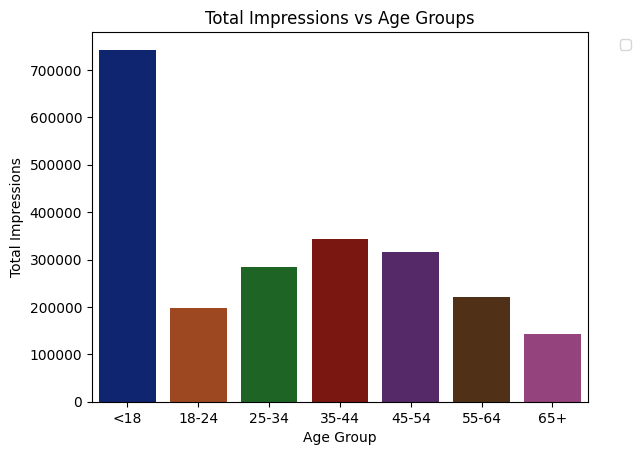

In [151]:
#Visualization to plot the sum of impressions grouped by age_group to check which stats of impressions per age_group

impressions_plt = day1_df.groupby('age_group')['Impressions'].sum().reset_index(name='No of Impressions')
sns.barplot(x='age_group', y='No of Impressions', data=impressions_plt, order=sorted_order_age_group)

#Adding labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Total Impressions')
plt.title('Total Impressions vs Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

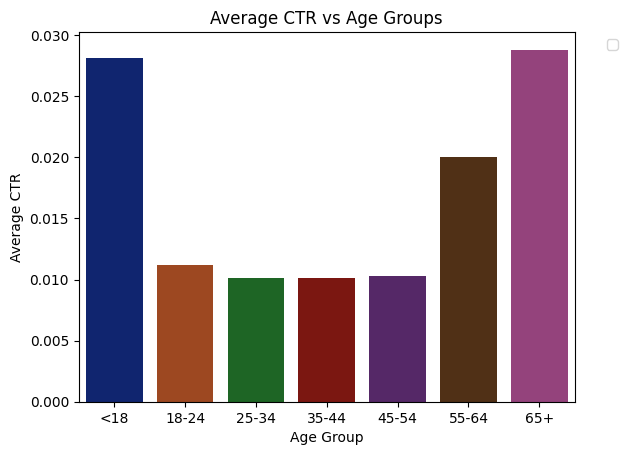

In [152]:
#Visualization to plot the avg Click-through-rate grouped by age_group to check which stats per age_group


ctr_plt = day1_df.groupby('age_group')['CTR'].mean().reset_index(name='Avg CTR')
sns.barplot(x='age_group', y='Avg CTR', data=ctr_plt, order=sorted_order_age_group)

#Adding labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Average CTR')
plt.title('Average CTR vs Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

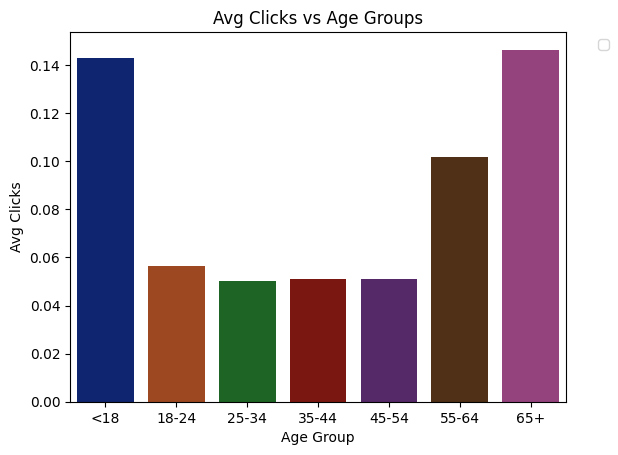

In [153]:
#This following visualization is for my understanding of the data
clicks_plt = day1_df.groupby('age_group')['Clicks'].mean().reset_index(name='Avg Clicks')
sns.barplot(x='age_group', y='Avg Clicks', data=clicks_plt, order=sorted_order_age_group)

#Adding labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Avg Clicks')
plt.title('Avg Clicks vs Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

## Part two

ii Define a new variable to segment or categorize users based on their click behavior

In [154]:
#understanding clicks - how the values vary for each person(row)
#there are some days when clicks are higher but the lowest noticed is 0
day1_df["Clicks"].describe()


count    449935.000000
mean          0.092796
std           0.310476
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           5.000000
Name: Clicks, dtype: float64

In [155]:
#Segregating click behavior to Low, Moderate and High based on number of clicks
def clickBehavior(clicks):
  if(clicks <=1):
    return "Low Engagement"
  elif clicks > 1 and clicks <=3:
    return "Moderate Engagement"
  else:
    return "High Engagement"

#Applying the predefined function to the dataframe
day1_df["Click_Behavior"] = day1_df["Clicks"].apply(clickBehavior)
day1_df

,Age,Gender,Impressions,Clicks,Signed_In,age_group,CTR,Click_Behavior
0,48,1,3,0,1,45-54,0.000000,Low Engagement
1,0,0,9,1,0,<18,0.111111,Low Engagement
2,15,1,4,0,1,<18,0.000000,Low Engagement
3,0,0,5,0,0,<18,0.000000,Low Engagement
4,0,0,7,1,0,<18,0.142857,Low Engagement
...,...,...,...,...,...,...,...,...
449930,21,1,5,0,1,18-24,0.000000,Low Engagement
449931,37,1,9,0,1,35-44,0.000000,Low Engagement
449932,52,1,2,0,1,45-54,0.000000,Low Engagement
449933,22,1,0,0,1,18-24,0.000000,Low Engagement


## Part three

iii Explore the data and make visual and quantitative comparisons across user segments/ demographics (<18 year old male vs < 18 year old females or logged-in vs not, for example).

Quantitative Comparisons

In [156]:
#Converting Gender, age_group, Signed_In and Click_Behavior as categories instead of "Object" type
day1_df['Gender'] = day1_df['Gender'].astype('category')
day1_df['age_group'] = day1_df['age_group'].astype('category')
day1_df['Click_Behavior'] = day1_df['Click_Behavior'].astype('category')
day1_df['Signed_In'] = day1_df['Signed_In'].astype('category')

In [157]:
#this is to understand the data in terms of quantitative stats, using include = "all" to include all the fields of the dataframe

day1_df.describe(include = "all")

,Age,Gender,Impressions,Clicks,Signed_In,age_group,CTR,Click_Behavior
count,449935.000000,449935.0,449935.000000,449935.000000,449935.0,449935,449935.000000,449935
unique,NaN,2.0,NaN,NaN,2.0,7,NaN,3
top,NaN,0.0,NaN,NaN,1.0,<18,NaN,Low Engagement
freq,NaN,281479.0,NaN,NaN,315363.0,148427,NaN,447514
mean,29.508509,NaN,4.999580,0.092796,NaN,NaN,0.018337,NaN
std,23.635757,NaN,2.233423,0.310476,NaN,NaN,0.068634,NaN
min,0.000000,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN
25%,0.000000,NaN,3.000000,0.000000,NaN,NaN,0.000000,NaN
50%,31.000000,NaN,5.000000,0.000000,NaN,NaN,0.000000,NaN
75%,48.000000,NaN,6.000000,0.000000,NaN,NaN,0.000000,NaN


In [158]:
# Creating a new DataFrame for visualization
stat_df = pd.DataFrame({
    'Mean': day1_df.mean(),
    'Median': day1_df.median(),
    'SD' : day1_df.std(),
    '25%': day1_df.quantile(0.25),
    '50%': day1_df.quantile(0.5),
    '75%': day1_df.quantile(0.75),
})

# using transpose to plot better for the visualization
stat_df = stat_df.transpose().reset_index()
stat_df

<ipython-input-158-333340c6af6a>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Mean': day1_df.mean(),
<ipython-input-158-333340c6af6a>:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'Median': day1_df.median(),
<ipython-input-158-333340c6af6a>:5: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'SD' 

,index,Age,Impressions,Clicks,CTR
0,Mean,29.508509,4.999580,0.092796,0.018337
1,Median,31.000000,5.000000,0.000000,0.000000
2,SD,23.635757,2.233423,0.310476,0.068634
3,25%,0.000000,3.000000,0.000000,0.000000
4,50%,31.000000,5.000000,0.000000,0.000000
5,75%,48.000000,6.000000,0.000000,0.000000


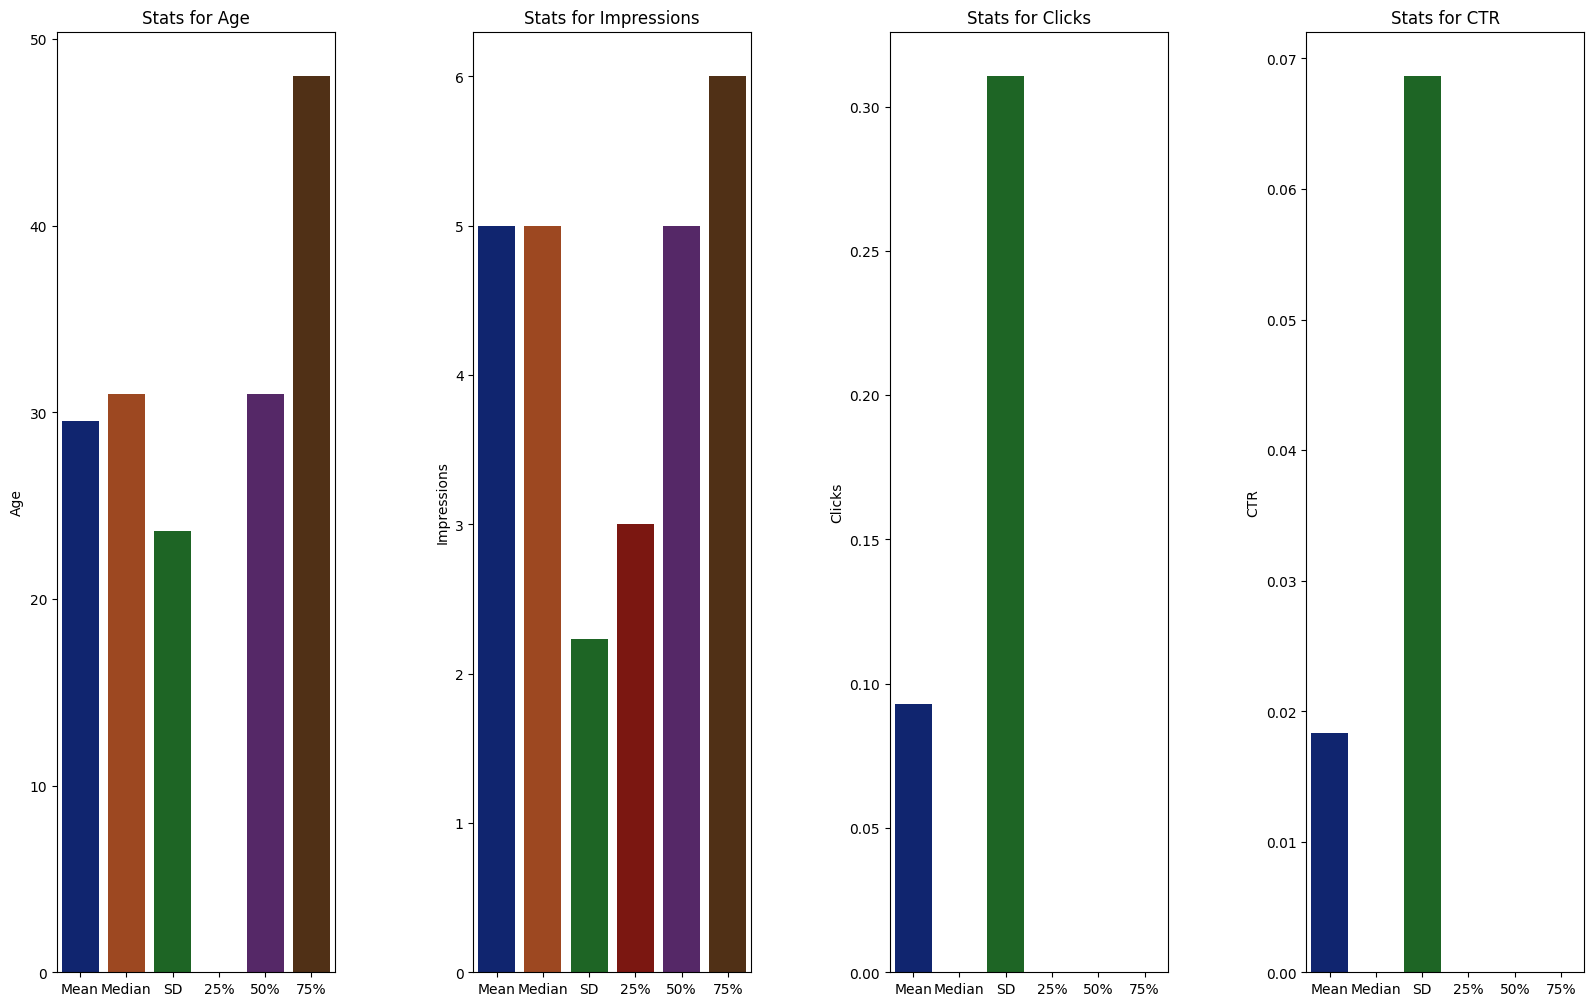

In [159]:
#Visualization measures across Age, Impressions, Clicks and CTR
fig, axs = plt.subplots(ncols=4, figsize=(16, 10))

plt.tight_layout()

sns.barplot(x='index', y='Age', data=stat_df, ax=axs[0])
#Adding labels and title to the chart
axs[0].set_xlabel('')
axs[0].set_title("Stats for Age")

sns.barplot(x='index', y='Impressions', data=stat_df, ax=axs[1])
axs[1].set_xlabel('')
axs[1].set_title("Stats for Impressions")

sns.barplot(x='index', y='Clicks', data=stat_df, ax=axs[2])
axs[2].set_xlabel('')
axs[2].set_title("Stats for Clicks")

sns.barplot(x='index', y='CTR', data=stat_df, ax=axs[3])
axs[3].set_xlabel('')
axs[3].set_title("Stats for CTR")

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


Visual Comparisons

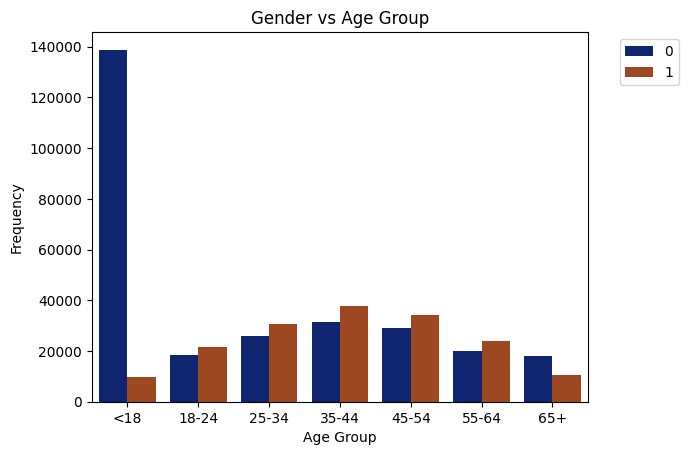

In [160]:
#Using Gender 0 and 1 because there's no information available
comp_plt = day1_df.groupby('age_group')['Gender'].value_counts().reset_index(name='Count')
comp_plt
sns.barplot(data=comp_plt, x="age_group", y="Count", hue="Gender", order= sorted_order_age_group)

#Adding labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Gender vs Age Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

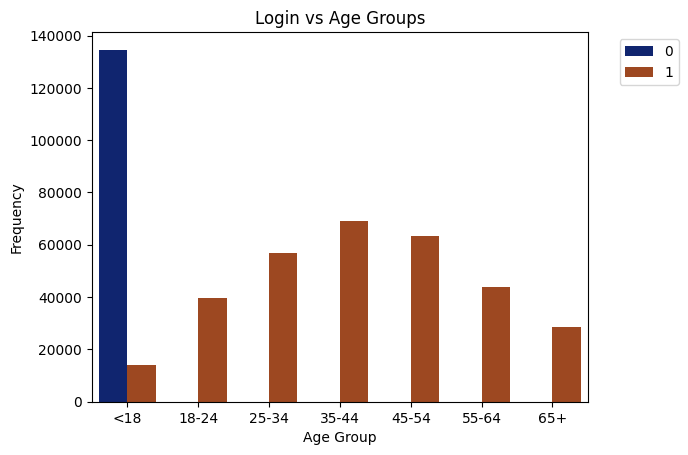

In [161]:
comp_plt = day1_df.groupby('age_group')['Signed_In'].value_counts().reset_index(name='Count')

sns.barplot(data=comp_plt, x="age_group", y="Count", hue="Signed_In", order = sorted_order_age_group)

#Adding labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.title('Login vs Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

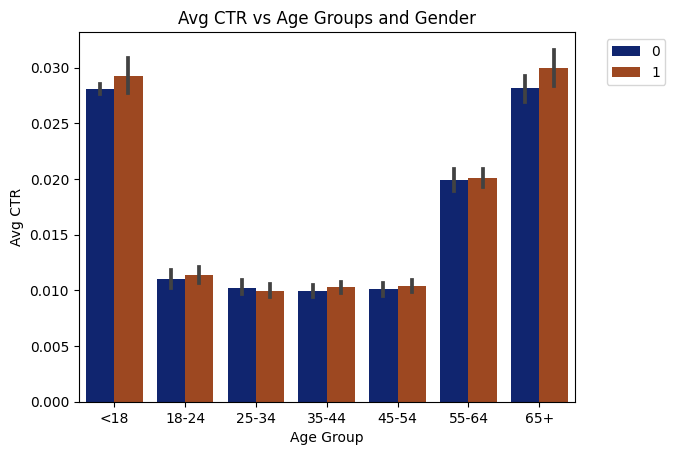

In [162]:
#age_group, gender and CTR

sns.barplot(x='age_group', y='CTR', hue="Gender", data=day1_df, order = sorted_order_age_group)

#Adding labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Avg CTR')
plt.title('Avg CTR vs Age Groups and Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

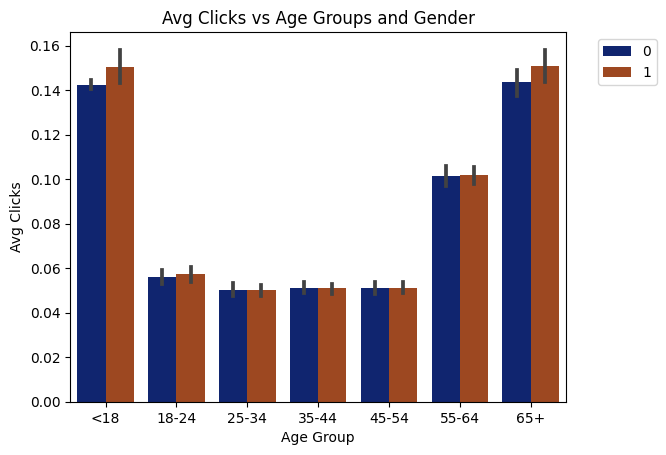

In [163]:
sns.barplot(x='age_group', y='Clicks', hue="Gender", data=day1_df, order = sorted_order_age_group)

#Adding labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Avg Clicks')
plt.title('Avg Clicks vs Age Groups and Gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

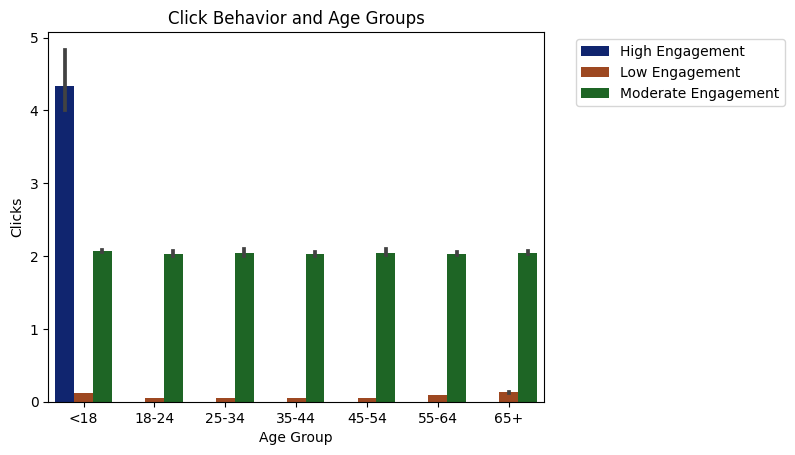

In [164]:
sns.barplot(x='age_group', y='Clicks', hue="Click_Behavior", data=day1_df, order = sorted_order_age_group)

#Adding labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Clicks')
plt.title('Click Behavior and Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

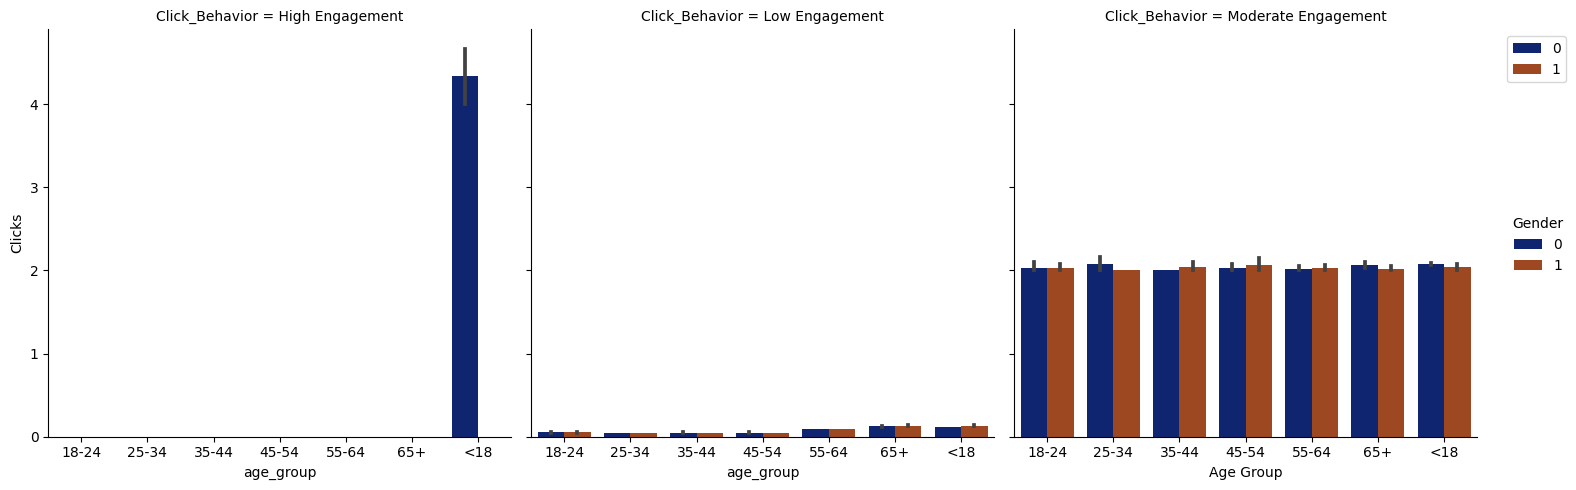

In [165]:
#using catplot since I am trying to use three categorical variables(age_group, gender and click_behavior)
# Click Engagement in Age Groups
sns.catplot(x='age_group', y='Clicks', hue='Gender', col='Click_Behavior', kind='bar', data=day1_df)

#Adding labels and title to the chart
plt.xlabel('Age Group')
plt.ylabel('Clicks')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

#Question 1c

Create metrics/measurements/statistics that summarize the data. Examples of potential metrics include CTR, quantiles, mean, median, variance, max, and these can be calculated across the various user segments. Be selective. Think about what will be important to track over time; what will compress the data, but still capture user behavior. Now extend your analysis across days (one week is sufficient). Visualize metrics and distributions over time. Your plot should emphasize what actually changes over days.

In [166]:
#reading the 7 files for week analysis and appending to one dataframe

days_files = glob.glob(PATH+'nyt*.csv')
week_df = []
week = 1
for day in days_files:
  print(day)
  df = pd.read_csv(day)
  df['Day'] = week
  week+=1
  week_df.append(df)

week_df

/content/drive/MyDrive/ENPM808W/nyt2.csv
/content/drive/MyDrive/ENPM808W/nyt3.csv
/content/drive/MyDrive/ENPM808W/nyt4.csv
/content/drive/MyDrive/ENPM808W/nyt5.csv
/content/drive/MyDrive/ENPM808W/nyt7.csv
/content/drive/MyDrive/ENPM808W/nyt6.csv
/content/drive/MyDrive/ENPM808W/nyt8.csv


[        Age  Gender  Impressions  Clicks  Signed_In  Day
 0        48       1            3       0          1    1
 1         0       0            9       1          0    1
 2        15       1            4       0          1    1
 3         0       0            5       0          0    1
 4         0       0            7       1          0    1
 ...     ...     ...          ...     ...        ...  ...
 449930   21       1            5       0          1    1
 449931   37       1            9       0          1    1
 449932   52       1            2       0          1    1
 449933   22       1            0       0          1    1
 449934   66       0            6       0          1    1
 
 [449935 rows x 6 columns],
         Age  Gender  Impressions  Clicks  Signed_In  Day
 0        46       1            3       0          1    2
 1        75       0            9       0          1    2
 2        39       0            2       0          1    2
 3        54       0            4       0 

In [167]:
week_df = pd.concat(week_df, ignore_index=True)
week_df["age_group"] = week_df["Age"].apply(ageGroup)

week_df["CTR"] = week_df.apply(calCTR,axis=1)
week_df["click_behavior"] = week_df["Clicks"].apply(clickBehavior)
week_df

,Age,Gender,Impressions,Clicks,Signed_In,Day,age_group,CTR,click_behavior
0,48,1,3,0,1,1,45-54,0.000000,Low Engagement
1,0,0,9,1,0,1,<18,0.111111,Low Engagement
2,15,1,4,0,1,1,<18,0.000000,Low Engagement
3,0,0,5,0,0,1,<18,0.000000,Low Engagement
4,0,0,7,1,0,1,<18,0.142857,Low Engagement
...,...,...,...,...,...,...,...,...,...
3383684,46,1,3,0,1,7,45-54,0.000000,Low Engagement
3383685,60,1,5,0,1,7,55-64,0.000000,Low Engagement
3383686,26,1,6,0,1,7,25-34,0.000000,Low Engagement
3383687,0,0,6,0,0,7,<18,0.000000,Low Engagement


In [168]:
#Creating a metrics df based on the weekdf dataframe for week analysis
metrics_df =week_df.groupby("Day").agg({
    "Impressions":['sum','mean','max','min','std'],
    "Clicks":['sum','mean','max','min','std'],
    "CTR": ['mean','max','min','std']
})
metrics_df.reset_index()
metrics_df

Impressions                             Clicks                    \
            sum      mean max min       std    sum      mean max min   
Day                                                                    
1       2249486  4.999580  19   0  2.233423  41752  0.092796   5   0   
2       2200239  4.996342  19   0  2.234935  40630  0.092263   6   0   
3       2215850  5.003534  18   0  2.236958  40990  0.092558   4   0   
4       1851162  4.998709  18   0  2.237361  34131  0.092164   5   0   
5       2262518  5.000117  19   0  2.236483  41870  0.092532   4   0   
6       3819108  4.995498  20   0  2.234439  70532  0.092258   4   0   
7       2316326  5.000747  18   0  2.230163  42465  0.091678   4   0   

                    CTR                      
          std      mean  max  min       std  
Day                                          
1    0.310476  0.018337  1.0  0.0  0.068634  
2    0.309662  0.018418  1.0  0.0  0.069254  
3    0.309831  0.018287  1.0  0.0  0.068632  
4    0.309516  0.018227  1.0  0.0  0.068207  
5    0.310539  0.018295  1.0  0.0  0.068533  
6    0.309788  0.018359  1.0  0.0  0.069127  
7    0.308691  0.018221  1.0  0.0  0.068794

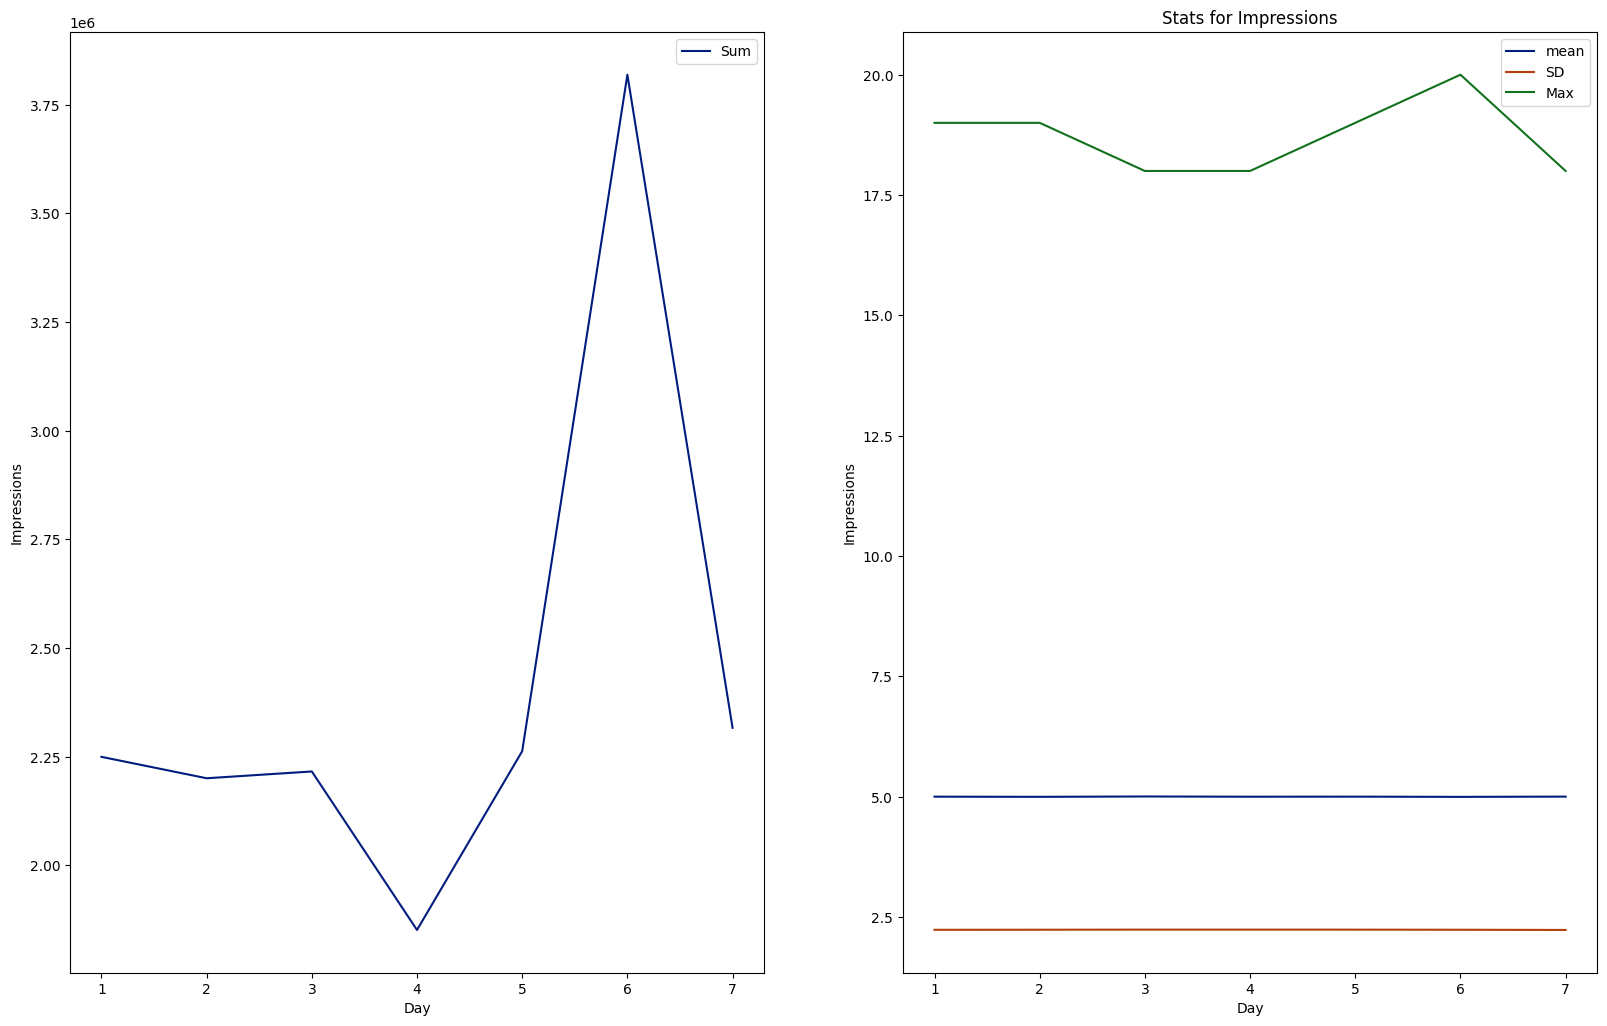

In [169]:
#Impressions
fig, axs = plt.subplots(ncols=2, figsize=(16, 10))

plt.tight_layout()


sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["Impressions"]["sum"], label = "Sum",  ax=axs[0])
axs[0].set_ylabel("Impressions")
sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["Impressions"]["mean"], label = "mean", ax=axs[1])
sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["Impressions"]["std"], label = "SD", ax=axs[1])
sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["Impressions"]["max"], label = "Max", ax=axs[1])
axs[1].set_ylabel("Impressions")
plt.title("Stats for Impressions")
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()


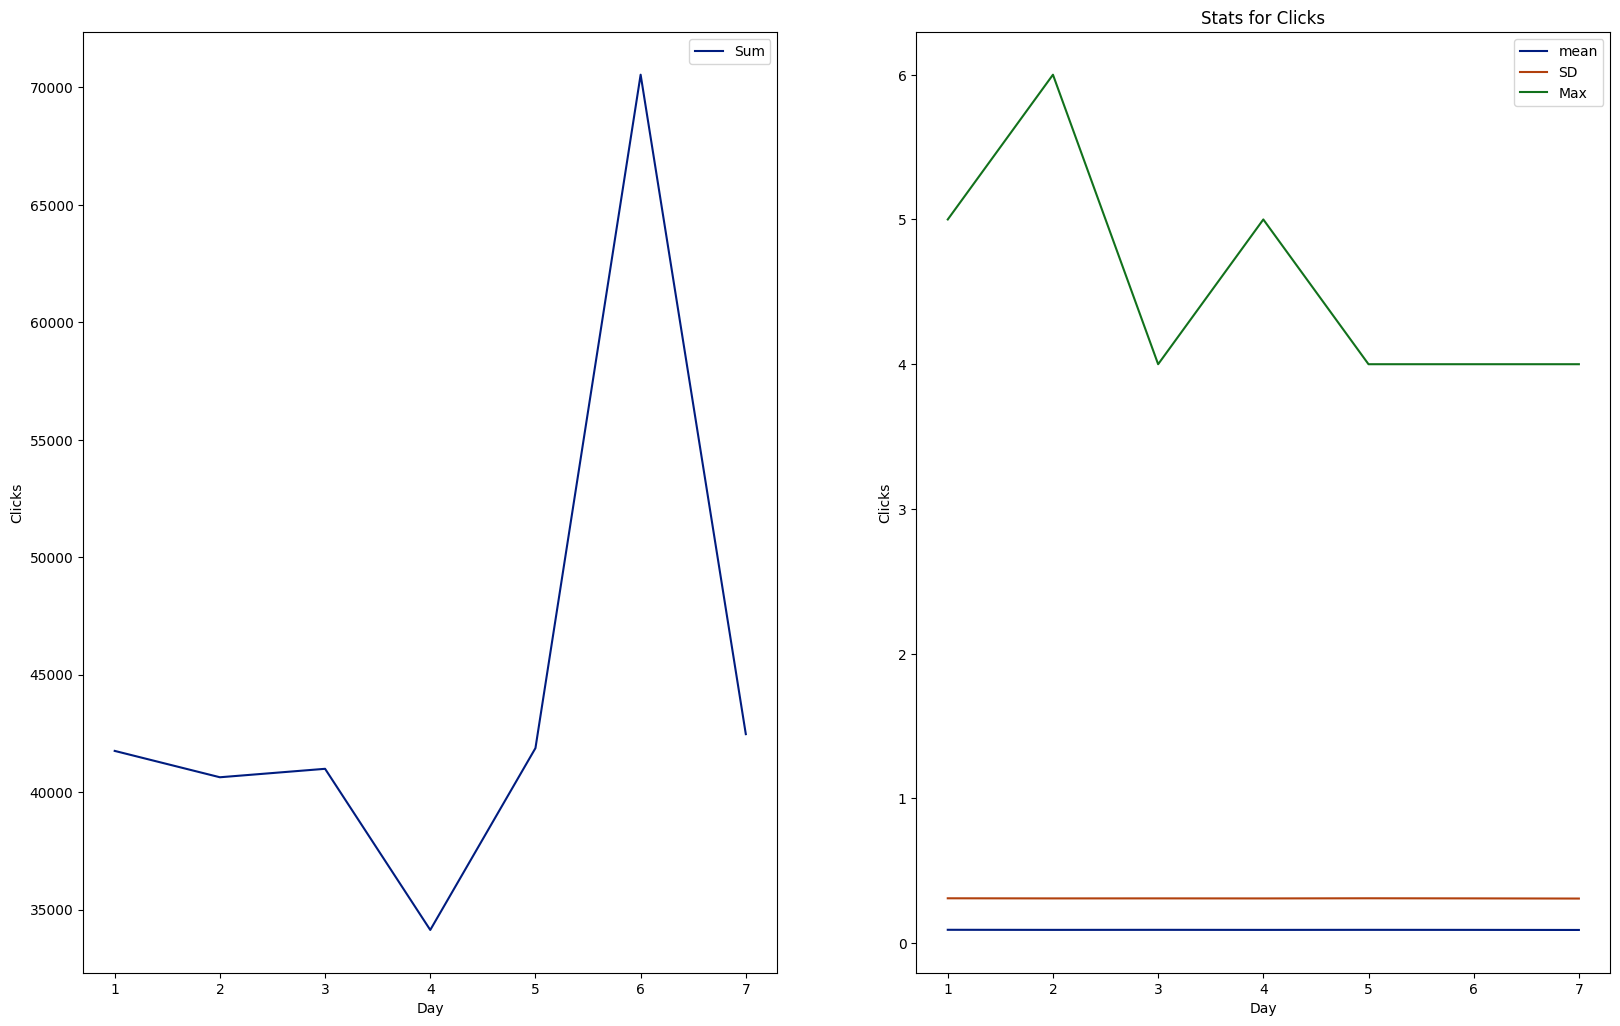

In [170]:
#Clicks
fig, axs = plt.subplots(ncols=2, figsize=(16, 10))

plt.tight_layout()


sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["Clicks"]["sum"], label = "Sum",  ax=axs[0])
axs[0].set_ylabel("Clicks")
sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["Clicks"]["mean"], label = "mean", ax=axs[1])
sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["Clicks"]["std"], label = "SD", ax=axs[1])
sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["Clicks"]["max"], label = "Max", ax=axs[1])
axs[1].set_ylabel("Clicks")
plt.title("Stats for Clicks")

plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

Text(0.5, 1.0, 'Stats for CTR')

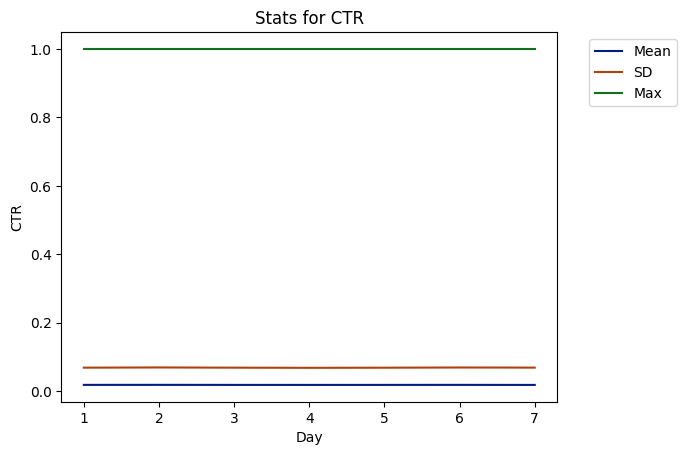

In [171]:
#CTR

sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["CTR"]["mean"], label = "Mean")
sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["CTR"]["std"], label = "SD")
sns.lineplot(data=metrics_df, x = "Day", y = metrics_df["CTR"]["max"], label = "Max")
#Adding labels and title to the chart
plt.ylabel('CTR')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Stats for CTR")

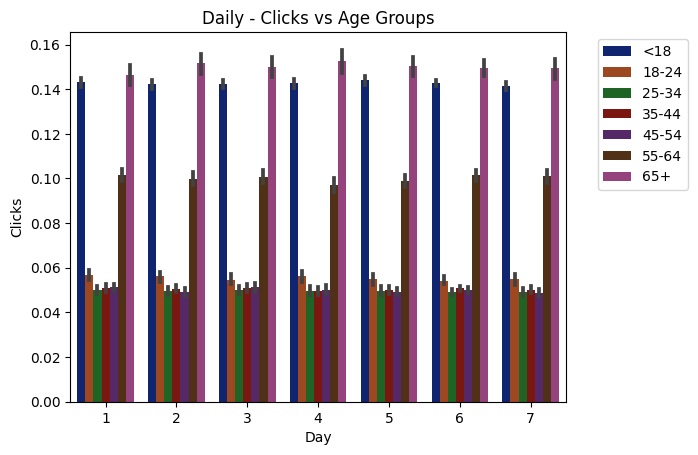

In [172]:
sns.barplot(x='Day', y='Clicks', hue="age_group", data=week_df, hue_order = sorted_order_age_group)
#Adding labels and title to the chart

plt.title('Daily - Clicks vs Age Groups')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

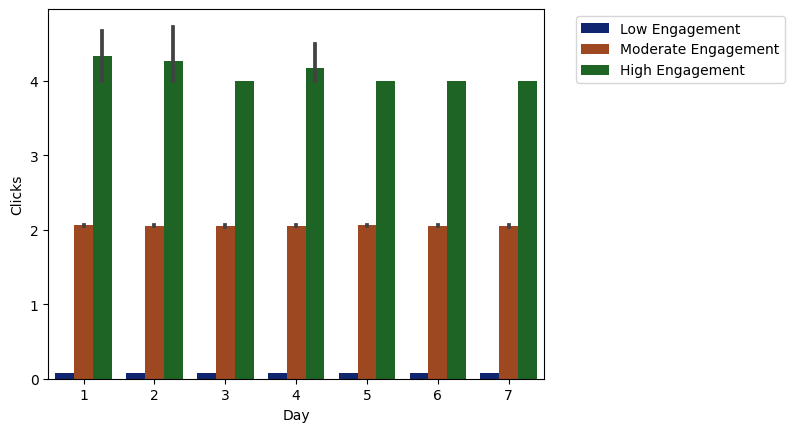

In [173]:
sns.barplot(x='Day', y='Clicks', hue="click_behavior", data=week_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

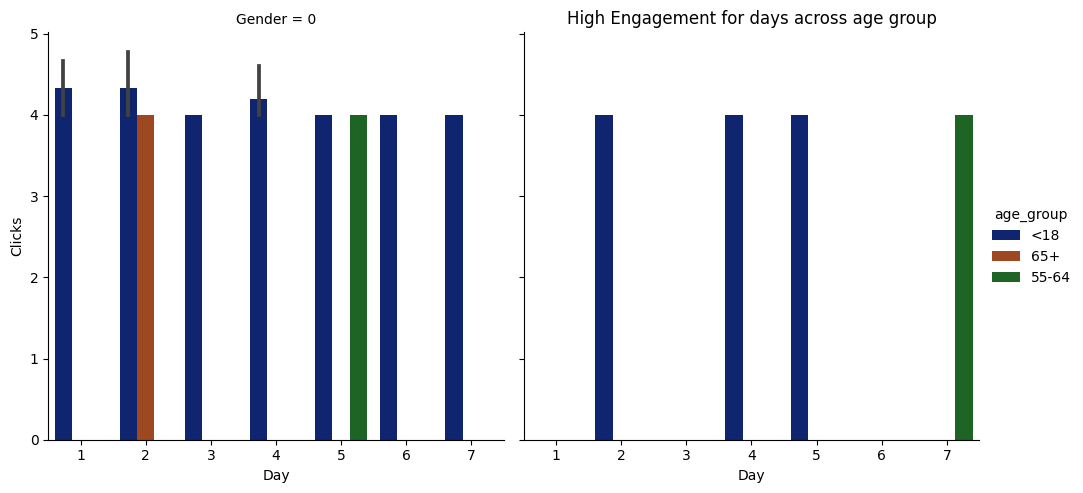

In [174]:
sns.catplot(x='Day', y='Clicks', hue='age_group', col='Gender', kind='bar', data=week_df[week_df["click_behavior"]=="High Engagement"])
plt.title("High Engagement for days across age group")
plt.show()

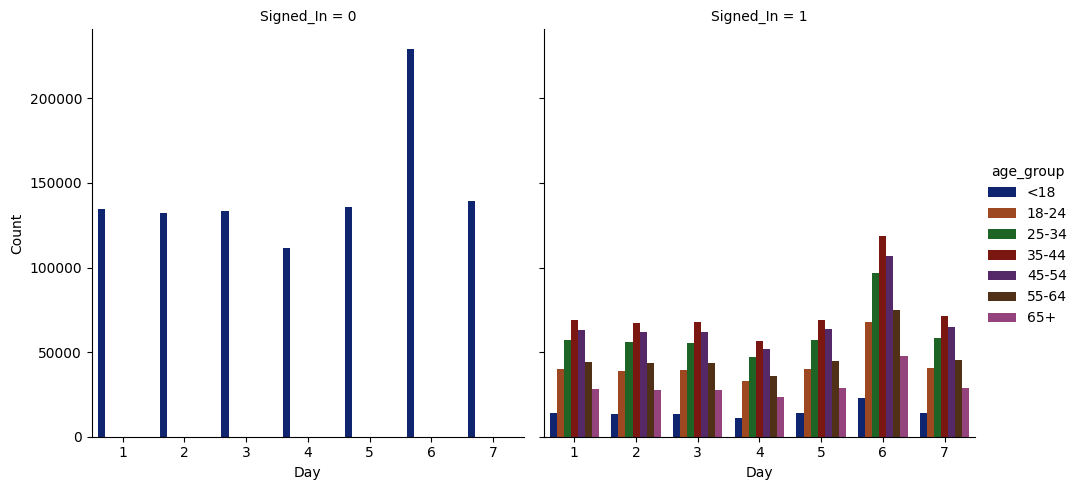

In [175]:
login_plt = week_df.groupby(['Day','age_group'])['Signed_In'].value_counts().reset_index(name='Count')
login_plt
sns.catplot(x='Day', y='Count', hue='age_group', col='Signed_In', kind='bar', data=login_plt, hue_order = sorted_order_age_group)



#Question 1d.
Describe and interpret any patterns you find. [Include in your writeup]

**Interpretations and Analysis**

***Note:***
1. These interpretations are limited to the days used for analysis and might not apply to other days.

2. Also, since no information about Gender 0 and 1 is given as to what is male/female, no assumption has been made and will further be used as 0 and 1 in the following analysis.

3. I did not remove the data that has age = 0 considering it might be erroneous entry rather than being wrong. All the entries for age = 0 are considered in age group < 18.

Based on single day and week analysis:

While impressions are comparitively low for people aged 55+(i.e 55- 64 and 65+) age groups, their clicks are higher, so their AVG CTR is high. In general scenario, impressions would be higher than clicks, so it is required to check why it is not in this scenario and assess via other factors.

Gender 0 is only high in case of age groups <18 and 65+, otherwise the count for Gender 1 is higher. It is also important to see that all the signed in = 0(i.e. users not logged in) come from age group < 18 category

Although there are differences based on age groups vs clicks/impressions/CTR, there is not a lot of difference when gender is added into the equation.

High engagement in click behavior is observed only for 3 age groups i.e. ages < 18, 55 - 64 and 65+

In terms of Clicks, Impressions and CTR, though values vary a bit for each day, the mean almost remains the same through out the week.






---



---



---



---



# Question 2

## Part a
For question 2, I am using Prince George County's crime data. It has 11 columns related to the incidents like the case ID, type of incident, reporting area, where the crime occured (location and address). It's also important that the crime location is rounded off to the nearest zero rather than the exact location to protect victim's identity and location.

In [176]:
data_df = pd.read_csv(PATH+"Crime_Incidents_July_2023_to_Present.csv")
data_df

,incident_case_id,date,clearance_code_inc_type,PGPD Reporting Area,PGPD Sector,PGPD BEAT,street_number,street_address,latitude,longitude,location
0,PP23091000001032,09/10/2023 12:00:00 AM,ACCIDENT,125,A,A3,6400 BLOCK,6401 NEW HAMPSHIRE AVE NB,38.967368,-77.000809,"(38.9673675596714,-77.00080911815166)"
1,PP23091100001376,09/11/2023 12:00:00 AM,ACCIDENT,704,E,E5,14500 BLOCK,14505 MARY BOWIE PKWY,38.886003,-76.754090,"(38.88600289821625,-76.75409044325352)"
2,PP23091300000566,09/13/2023 12:00:00 AM,THEFT FROM AUTO,104,A,A7,1800 BLOCK,1824 METZEROTT RD,39.003785,-76.975547,"(39.00378480553627,-76.97554670274258)"
3,PP23091400000319,09/14/2023 12:00:00 AM,"B & E, RESIDENTIAL",837,D,D1,6500 BLOCK,6505 94TH AVE,38.975242,-76.848250,"(38.97524155676365,-76.8482503592968)"
4,PP23090900000228,09/09/2023 12:00:00 AM,"ROBBERY, OTHER",504,K,K1,3500 BLOCK,3525 CHADWICK CT,38.841384,-76.965704,"(38.841383561491966,-76.96570420265198)"
...,...,...,...,...,...,...,...,...,...,...,...
7049,PP23071700002479,07/17/2023 12:00:00 AM,THEFT,923,C,C2,13100 BLOCK,13129 WELLFORD DR,39.060543,-76.931255,"(39.06054322421551,-76.9312554448843)"
7050,PP23071700001200,07/17/2023 12:00:00 AM,THEFT FROM AUTO,940,C,C1,10900 BLOCK,10925 BALTIMORE AVE NB,39.032328,-76.907962,"(39.03232805430889,-76.90796153247356)"
7051,PP23070400000196,07/04/2023 12:00:00 AM,THEFT,206,B,B63,7300 BLOCK,7300 BALTIMORE AVE SB,38.979835,-76.938473,"(38.97983472049236,-76.93847328424454)"
7052,PP23070100001094,07/01/2023 12:00:00 AM,THEFT,504,K,K1,4200 BLOCK,4208 21ST AVE,38.831541,-76.964064,"(38.83154106140137,-76.96406377851963)"


In [177]:
data_df.dtypes

incident_case_id            object
date                        object
clearance_code_inc_type     object
PGPD Reporting Area          int64
PGPD Sector                 object
PGPD BEAT                   object
street_number               object
street_address              object
latitude                   float64
longitude                  float64
location                    object
dtype: object

In [178]:
data_df.head()

,incident_case_id,date,clearance_code_inc_type,PGPD Reporting Area,PGPD Sector,PGPD BEAT,street_number,street_address,latitude,longitude,location
0,PP23091000001032,09/10/2023 12:00:00 AM,ACCIDENT,125,A,A3,6400 BLOCK,6401 NEW HAMPSHIRE AVE NB,38.967368,-77.000809,"(38.9673675596714,-77.00080911815166)"
1,PP23091100001376,09/11/2023 12:00:00 AM,ACCIDENT,704,E,E5,14500 BLOCK,14505 MARY BOWIE PKWY,38.886003,-76.754090,"(38.88600289821625,-76.75409044325352)"
2,PP23091300000566,09/13/2023 12:00:00 AM,THEFT FROM AUTO,104,A,A7,1800 BLOCK,1824 METZEROTT RD,39.003785,-76.975547,"(39.00378480553627,-76.97554670274258)"
3,PP23091400000319,09/14/2023 12:00:00 AM,"B & E, RESIDENTIAL",837,D,D1,6500 BLOCK,6505 94TH AVE,38.975242,-76.848250,"(38.97524155676365,-76.8482503592968)"
4,PP23090900000228,09/09/2023 12:00:00 AM,"ROBBERY, OTHER",504,K,K1,3500 BLOCK,3525 CHADWICK CT,38.841384,-76.965704,"(38.841383561491966,-76.96570420265198)"


In [179]:
data_df.describe(include="all")

,incident_case_id,date,clearance_code_inc_type,PGPD Reporting Area,PGPD Sector,PGPD BEAT,street_number,street_address,latitude,longitude,location
count,7054,7054,7054,7054.000000,7054,7054,5632,7054,7054.000000,7054.000000,7054
unique,7054,90,18,NaN,14,79,188,5521,NaN,NaN,4928
top,PP23091000001032,07/16/2023 12:00:00 AM,"AUTO, STOLEN",NaN,H,E2,6100 BLOCK,6800 OXON HILL RD,NaN,NaN,"(38.79479572176933,-77.00080911815166)"
freq,1,108,1551,NaN,897,228,127,21,NaN,NaN,21
mean,NaN,NaN,NaN,576.097392,NaN,NaN,NaN,NaN,38.881926,-76.885921,NaN
std,NaN,NaN,NaN,573.219815,NaN,NaN,NaN,NaN,0.661005,1.296353,NaN
min,NaN,NaN,NaN,101.000000,NaN,NaN,NaN,NaN,-0.000074,-77.053959,NaN
25%,NaN,NaN,NaN,313.000000,NaN,NaN,NaN,NaN,38.827604,-76.956846,NaN
50%,NaN,NaN,NaN,505.000000,NaN,NaN,NaN,NaN,38.890596,-76.911570,NaN
75%,NaN,NaN,NaN,720.000000,NaN,NaN,NaN,NaN,38.965071,-76.861374,NaN


In [180]:
#Converting to categories
data_df["PGPD Reporting Area"] = data_df["PGPD Reporting Area"].astype("category")
data_df["clearance_code_inc_type"] = data_df["clearance_code_inc_type"].astype("category")

data_df["latitude"] = data_df["latitude"].astype(float)
data_df["longitude"] = data_df["longitude"].astype(float)

#making the date a datetime object and removing the 12:00 AM since it's common for all
data_df[["date", "time"]] = data_df['date'].str.split(n=1, expand=True)
data_df.drop("time", axis = 1,inplace = True)

data_df.drop("PGPD BEAT", axis = 1, inplace = True)
data_df.drop("street_number", axis = 1, inplace = True)
data_df.drop("street_address", axis = 1, inplace = True)
data_df

,incident_case_id,date,clearance_code_inc_type,PGPD Reporting Area,PGPD Sector,latitude,longitude,location
0,PP23091000001032,09/10/2023,ACCIDENT,125,A,38.967368,-77.000809,"(38.9673675596714,-77.00080911815166)"
1,PP23091100001376,09/11/2023,ACCIDENT,704,E,38.886003,-76.754090,"(38.88600289821625,-76.75409044325352)"
2,PP23091300000566,09/13/2023,THEFT FROM AUTO,104,A,39.003785,-76.975547,"(39.00378480553627,-76.97554670274258)"
3,PP23091400000319,09/14/2023,"B & E, RESIDENTIAL",837,D,38.975242,-76.848250,"(38.97524155676365,-76.8482503592968)"
4,PP23090900000228,09/09/2023,"ROBBERY, OTHER",504,K,38.841384,-76.965704,"(38.841383561491966,-76.96570420265198)"
...,...,...,...,...,...,...,...,...
7049,PP23071700002479,07/17/2023,THEFT,923,C,39.060543,-76.931255,"(39.06054322421551,-76.9312554448843)"
7050,PP23071700001200,07/17/2023,THEFT FROM AUTO,940,C,39.032328,-76.907962,"(39.03232805430889,-76.90796153247356)"
7051,PP23070400000196,07/04/2023,THEFT,206,B,38.979835,-76.938473,"(38.97983472049236,-76.93847328424454)"
7052,PP23070100001094,07/01/2023,THEFT,504,K,38.831541,-76.964064,"(38.83154106140137,-76.96406377851963)"


In [181]:
data_df

,incident_case_id,date,clearance_code_inc_type,PGPD Reporting Area,PGPD Sector,latitude,longitude,location
0,PP23091000001032,09/10/2023,ACCIDENT,125,A,38.967368,-77.000809,"(38.9673675596714,-77.00080911815166)"
1,PP23091100001376,09/11/2023,ACCIDENT,704,E,38.886003,-76.754090,"(38.88600289821625,-76.75409044325352)"
2,PP23091300000566,09/13/2023,THEFT FROM AUTO,104,A,39.003785,-76.975547,"(39.00378480553627,-76.97554670274258)"
3,PP23091400000319,09/14/2023,"B & E, RESIDENTIAL",837,D,38.975242,-76.848250,"(38.97524155676365,-76.8482503592968)"
4,PP23090900000228,09/09/2023,"ROBBERY, OTHER",504,K,38.841384,-76.965704,"(38.841383561491966,-76.96570420265198)"
...,...,...,...,...,...,...,...,...
7049,PP23071700002479,07/17/2023,THEFT,923,C,39.060543,-76.931255,"(39.06054322421551,-76.9312554448843)"
7050,PP23071700001200,07/17/2023,THEFT FROM AUTO,940,C,39.032328,-76.907962,"(39.03232805430889,-76.90796153247356)"
7051,PP23070400000196,07/04/2023,THEFT,206,B,38.979835,-76.938473,"(38.97983472049236,-76.93847328424454)"
7052,PP23070100001094,07/01/2023,THEFT,504,K,38.831541,-76.964064,"(38.83154106140137,-76.96406377851963)"


In [182]:
data_df["date"] = pd.to_datetime(data_df["date"])

In [183]:
crime_size = data_df.groupby("clearance_code_inc_type").size().reset_index(name="Count of Crimes")
crime_size.sort_values("Count of Crimes", inplace= True,ascending = False)
crime_size

,clearance_code_inc_type,Count of Crimes
5,"AUTO, STOLEN",1551
0,ACCIDENT,1447
17,THEFT FROM AUTO,1269
1,ACCIDENT WITH IMPOUND,930
16,THEFT,781
2,ASSAULT,200
12,"ROBBERY, OTHER",154
6,"AUTO, STOLEN & RECOVERED",152
7,"B & E, COMMERCIAL",116
9,"B & E, RESIDENTIAL",112


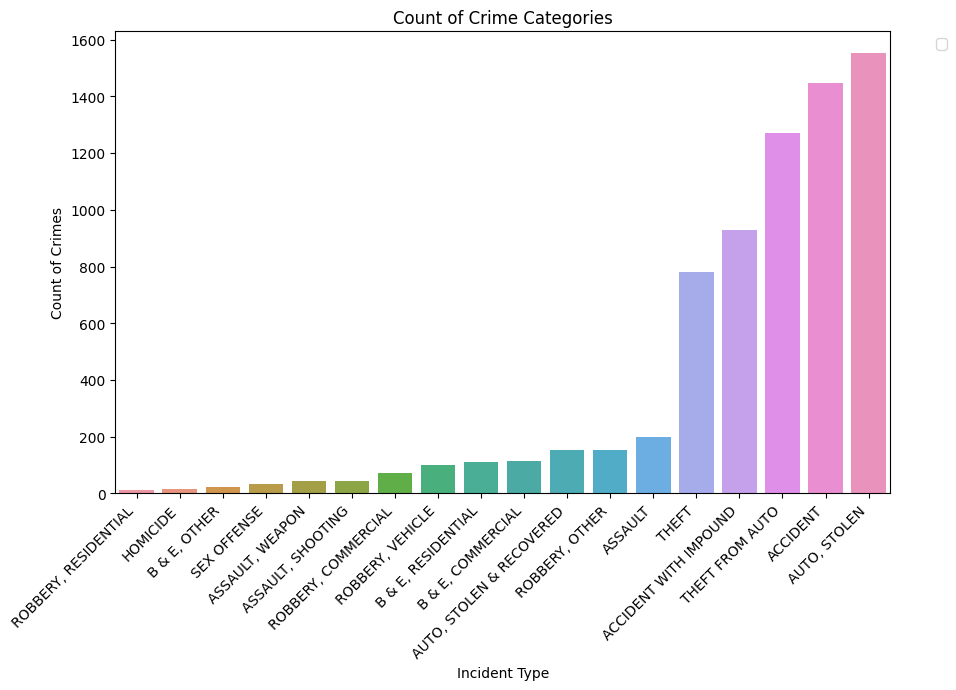

In [184]:

plt.figure(figsize=(10, 6))

sns.barplot(data= crime_size, x = "clearance_code_inc_type", y ="Count of Crimes",order=crime_size.sort_values('Count of Crimes').clearance_code_inc_type)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Incident Type')
plt.ylabel('Count of Crimes')
plt.title('Count of Crime Categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [185]:
# data_df.index = pd.to_datetime(data_df['date'],format='%M/%D/%Y')
# date_df = data_df.reset_index()

date_df = data_df.groupby(by=data_df['date'].dt.month).size().reset_index(name="Count of Crimes")
date_df['month'] = date_df['date'].apply(lambda x: datetime(2023, x, 1).strftime('%B'))

date_df

,date,Count of Crimes,month
0,7,2464,July
1,8,2480,August
2,9,2110,September


Text(0.5, 1.0, 'Crimes over the months')

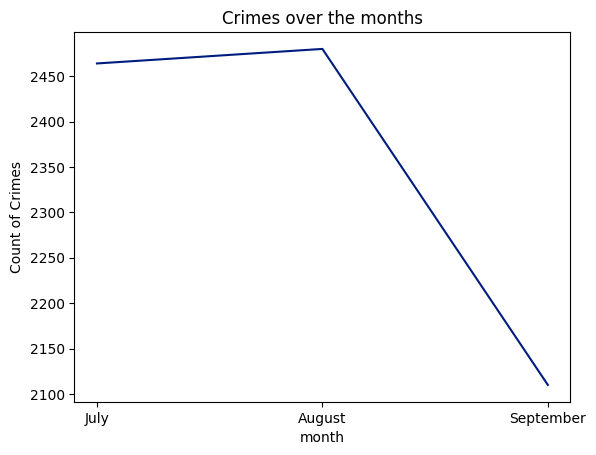

In [193]:
sns.lineplot(data = date_df, x = "month", y="Count of Crimes")
plt.title("Crimes over the months")

In [187]:
crime_cat_df = data_df.groupby([data_df['date'].dt.month,data_df["clearance_code_inc_type"]]).size().reset_index(name="Count of Crimes")
crime_cat_df['month'] = crime_cat_df['date'].apply(lambda x: datetime(2023, x, 1).strftime('%B'))

crime_cat_df

,date,clearance_code_inc_type,Count of Crimes,month
0,7,ACCIDENT,472,July
1,7,ACCIDENT WITH IMPOUND,340,July
2,7,ASSAULT,59,July
3,7,"ASSAULT, SHOOTING",22,July
4,7,"ASSAULT, WEAPON",12,July
5,7,"AUTO, STOLEN",611,July
6,7,"AUTO, STOLEN & RECOVERED",62,July
7,7,"B & E, COMMERCIAL",40,July
8,7,"B & E, OTHER",5,July
9,7,"B & E, RESIDENTIAL",36,July


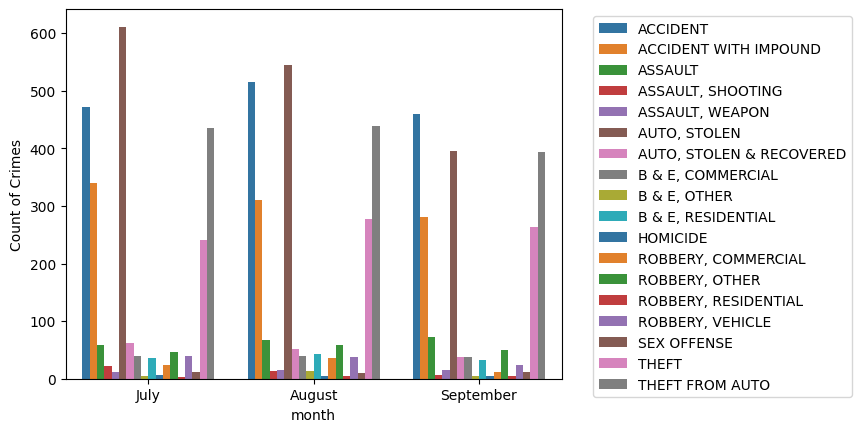

In [188]:
#
sns.barplot(x='month', y='Count of Crimes', hue="clearance_code_inc_type", data=crime_cat_df, palette = "tab10")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


In [189]:
#PGPD Reporting Areas with highest count of crimes recorded
crime_cat_df = data_df.groupby([data_df["PGPD Reporting Area"],data_df["PGPD Sector"]]).size().reset_index(name="Count of Crimes")
crime_cat_df = crime_cat_df.loc[crime_cat_df["Count of Crimes"] > 0]

crime_cat_df.sort_values("Count of Crimes", ascending = False,inplace = True)
crime_cat_df.head(15)


,PGPD Reporting Area,PGPD Sector,Count of Crimes
4204,858,E,124
1127,313,G,98
112,110,A,90
1351,407,G,90
2879,656,J,80
1590,424,H,79
1772,441,H,79
2902,701,E,76
1464,415,H,70
1506,418,H,68


In [190]:
!ls $PATH

cb_2018_24_place_500k			  nyt4.csv	 Street_Centerline_Ln
Crime_Incidents_July_2023_to_Present.csv  nyt5.csv	 tl_2018_24033_roads
Latitude_Longitude_Ln			  nyt6.csv	 tl_rd22_24033_edges
Latitude_Longitude_Pt			  nyt7.csv	 tl_rd22_24033_roads
nyt2.csv				  nyt8.csv
nyt3.csv				  Plat_Bound_Py


In [191]:
gdf = geopandas.GeoDataFrame.from_file(os.path.join(PATH, "tl_rd22_24033_edges/tl_rd22_24033_edges.shp"))

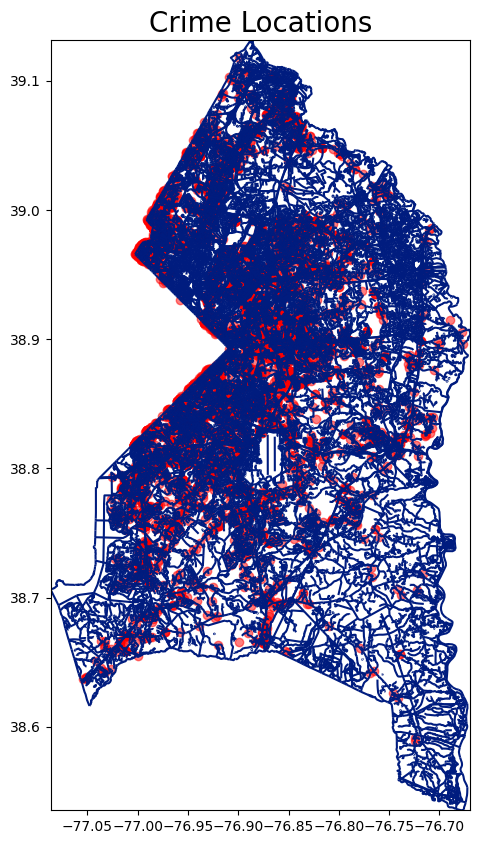

In [192]:
#Plotting the location of crime based on data

ax = gdf.plot(figsize=(10, 10))
ax.set_xlim(gdf.total_bounds[0], gdf.total_bounds[2])
ax.set_ylim(gdf.total_bounds[1], gdf.total_bounds[3])
plt.scatter(x=data_df['longitude'], y=data_df['latitude'], alpha=.5, c='r')
plt.title('Crime Locations', size=20)
plt.show()

## Part b

Explain what (if anything) you had to do to make the data usable. This will likely be influenced by what visualizations analyses you want to do with your data.

The first step was to check the datatypes if all can be used as is for analysis or if changes are required. I ended up changing some columns to categories to make it clear.

The date field has unnecessary time stamp which I removed since it does not add any further value.

I also removed columns that were not necessary to the analysis.


#References:


1.   Waskom, M. L., (2021). seaborn: statistical data visualization. Journal of Open Source Software, 6(60), 3021, https://doi.org/10.21105/joss.03021.

2. Prince George's County Government. (2023). Crime Incidents, July 2023 to Present [Data set]. Prince George's County Open Data. https://data.princegeorgescountymd.gov/Public-Safety/Crime-Incidents-July-2023-to-Present/xjru-idbe

3.   Bike Share Class Notebook(For the map)

